## Final Project for Programming Analytics

In [1]:
#Importing Libraries 
import pandas as pd 
import datetime 
import numpy as np
from math import sqrt
import scipy.stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas import DataFrame
import itertools
import timeit

#Type plot - XKCD 
#plt.xkcd()

#plotting inline
%matplotlib inline

In [2]:
%%javascript
//This function is used to Plot Graph in Jupyter with keeping Autoscrolling off.
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}

<IPython.core.display.Javascript object>

In [3]:
#Start date and End date is refers to time period for fetching the data using the Pandas dataframe API
#We have selected data for atleast 1 years to include variability due to seasoning and external conditions over the period of one year
start_date = datetime.datetime(2016, 12, 15)
end_date = datetime.datetime(2017, 12, 14)
days = 365

Fetching Data for the individual Crypto-Currency in individual blocks to make sure they are loaded properly without any errors, Fetching data in a single go is creating problems. A single loop would have been enough but Yahoo-Ticker is not always up! 

In [4]:
#Bitcion to USD Trading Data
BTC_USD = web.DataReader("BTC-USD", "yahoo", start_date, end_date)
BTC_USD.to_csv("BTC_USD.csv")

In [5]:
#Ethereium to USD Trading Data
ETH_USD = web.DataReader("ETH-USD", "yahoo", start_date, end_date)
ETH_USD.to_csv("ETH_USD.csv")

In [6]:
#Litecoin to USD Trading Data
LTC_USD = web.DataReader("LTC-USD", "yahoo", start_date, end_date)
LTC_USD.to_csv("LTC_USD.csv")

In [7]:
#XRP to USD Trading Data
XRP_USD = web.DataReader("XRP-USD", "yahoo", start_date, end_date)
XRP_USD.to_csv("XRP_USD.csv")

In [9]:
#Bitcoin_cash to USD Trading Data
BCH_USD = web.DataReader("LTC-USD", "yahoo", start_date, end_date)
BCH_USD.to_csv("BCH_USD.csv")

In [10]:
#IOTA to USD Trading Data
IOT_USD = web.DataReader("IOT-USD", "yahoo", start_date, end_date)
IOT_USD.to_csv("IOT_USD.csv")

In [12]:
#DASH-USD to USD Trading Data
DSH_USD = web.DataReader("DASH-USD", "yahoo", start_date, end_date)
DSH_USD.to_csv("DSH_USD.csv")

In [13]:
Coin_list = [BTC_USD, LTC_USD, BCH_USD, DSH_USD, ETH_USD, IOT_USD, XRP_USD]
Coin_list_str = ["BTC_USD", "LTC_USD", "BCH_USD", "DSH_USD", "ETH_USD", "IOT_USD", "XRP_USD"]

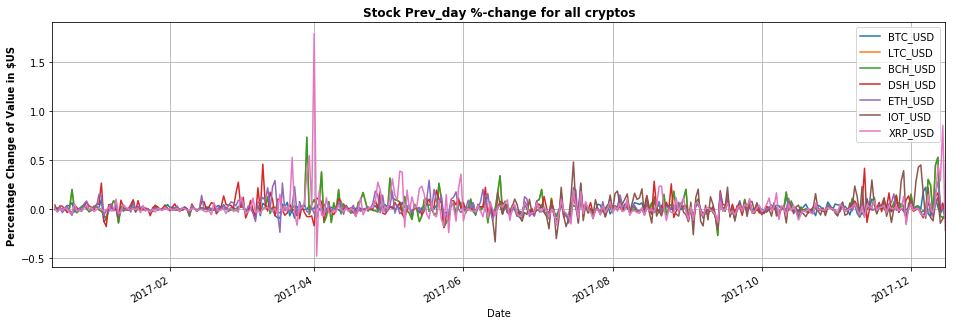

In [14]:
#Testing_Data, checking daily returns over the entire period
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    i["Adj Close"].pct_change().plot(figsize=(16,5), grid=True)
    plt.title(u"Stock Prev_day %-change for all cryptos", weight='bold')
    plt.ylabel("Percentage Change of Value in $US",weight='bold')
    plt.legend(Coin_list_str)

In [15]:
#Finding the Anual compound growth rate for Bitcoin(mu) 
Mu_BTC = ((((BTC_USD['Adj Close'][-1]) / BTC_USD['Adj Close'][1]))**(365.0/days)) - 1 
#Finding the Anual volatility of return for Bitcoin. 
BTC_USD['Returns'] = BTC_USD['Adj Close'].pct_change()
Vol_BTC = BTC_USD['Returns'].std()*sqrt(252)

print("Annual Compound Growth Rate for Bitcoin- " + str(round(Mu_BTC,3))+"%")
print("Annual Volatility of return for Bitcoin- " + str(round(Vol_BTC*100,3)) +"%")

Annual Compound Growth Rate for Bitcoin- 21.356%
Annual Volatility of return for Bitcoin- 74.734%


In [16]:
#Finding the Anual compound growth rate for Litecoin(mu) 
Mu_LTC = ((((LTC_USD['Adj Close'][-1]) / LTC_USD['Adj Close'][1]))**(365.0/days)) - 1 
#Finding the Anual volatility of return for Bitcoin. 
LTC_USD['Returns'] = LTC_USD['Adj Close'].pct_change()
Vol_LTC = LTC_USD['Returns'].std()*sqrt(252)

print("Annual Compound Growth Rate for Litecoin- " + str(round(Mu_LTC,3))+"%")
print("Annual Volatility of return for Litecoin- " + str(round(Vol_LTC*100,3)) +"%")

Annual Compound Growth Rate for Litecoin- 71.552%
Annual Volatility of return for Litecoin- 140.807%


In [17]:
#Finding the Anual compound growth rate for Bitcoin cash(mu) 
Mu_BCH = ((((BCH_USD['Adj Close'][-1]) / BCH_USD['Adj Close'][1]))**(365.0/days)) - 1 
#Finding the Anual volatility of return for Bitcoin cash . 
BCH_USD['Returns'] = BCH_USD['Adj Close'].pct_change()
Vol_BCH = BCH_USD['Returns'].std()*sqrt(252)

print("Annual Compound Growth Rate for Bitcoin Cash- " + str(round(Mu_BCH,3)))
print("Annual Volatility of return for Bitcoin Cash- " + str(round(Vol_BCH*100,3)) +"%")

Annual Compound Growth Rate for Bitcoin Cash- 71.481
Annual Volatility of return for Bitcoin Cash- 140.81%


In [18]:
#Finding the Anual compound growth rate for Dash Coin(mu) 
Mu_DSH = ((((DSH_USD['Adj Close'][-1]) / DSH_USD['Adj Close'][1]))**(365.0/days)) - 1 
#Finding the Anual volatility of return for Dash coin. 
DSH_USD['Returns'] = DSH_USD['Adj Close'].pct_change()
Vol_DSH = DSH_USD['Returns'].std()*sqrt(252)

print("Annual Compound Growth Rate for Dash Coin- " + str(round(Mu_DSH,3)) +"%")
print("Annual Volatility of return for Dash COin- " + str(round(Vol_DSH*100,3)) +"%")

Annual Compound Growth Rate for Dash Coin- 86.086%
Annual Volatility of return for Dash COin- 118.588%


In [19]:
#Finding the Anual compound growth rate for Ethereum(mu) 
Mu_ETH = ((((ETH_USD['Adj Close'][-1]) / ETH_USD['Adj Close'][1]))**(365.0/days)) - 1 
#Finding the Anual volatility of return for Ethereum. 
ETH_USD['Returns'] = ETH_USD['Adj Close'].pct_change()
Vol_ETH = ETH_USD['Returns'].std()*sqrt(252)

print("Annual Compound Growth Rate for Ethereum- " + str(round(Mu_ETH,3)) +"%")
print("Annual Volatility of return for Ethereum- " + str(round(Vol_ETH*100,3)) +"%")

Annual Compound Growth Rate for Ethereum- 79.544%
Annual Volatility of return for Ethereum- 112.42%


In [20]:
#Finding the Anual compound growth rate for IOTA Coin(mu) 
Mu_IOT = ((((IOT_USD['Adj Close'][-1]) / IOT_USD['Adj Close'][1]))**(365.0/days)) - 1 
#Finding the Anual volatility of return for IOTA Coin. 
IOT_USD['Returns'] = IOT_USD['Adj Close'].pct_change()
Vol_IOT = IOT_USD['Returns'].std()*sqrt(252)

print("Annual Compound Growth Rate for IOTA Coin- " + str(round(Mu_IOT,3)) +"%")
print("Annual Volatility of return for IOTA Coin- " + str(round(Vol_IOT*100,3)) +"%")

Annual Compound Growth Rate for IOTA Coin- 5.421%
Annual Volatility of return for IOTA Coin- 194.966%


In [21]:
#Finding the Anual compound growth rate for Ripple Coin(mu) 
Mu_XRP = ((((XRP_USD['Adj Close'][-1]) / XRP_USD['Adj Close'][1]))**(365.0/days)) - 1 
#Finding the Anual volatility of return for Ripple Coin. 
XRP_USD['Returns'] = XRP_USD['Adj Close'].pct_change()
Vol_XRP = XRP_USD['Returns'].std()*sqrt(252)

print("Annual Compound Growth Rate for Ripple Coin- " + str(round(Mu_XRP,5)) +"%")
print("Annual Volatility of return for Ripple Coin- " + str(round(Vol_XRP*100,5)) +"%")

Annual Compound Growth Rate for Ripple Coin- 98.4622%
Annual Volatility of return for Ripple Coin- 223.83594%


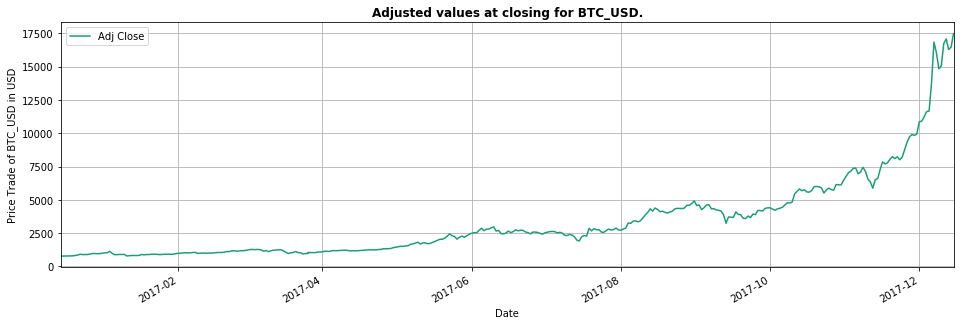

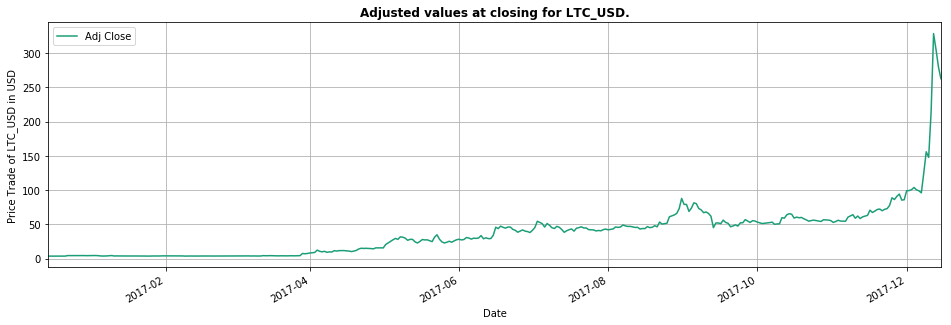

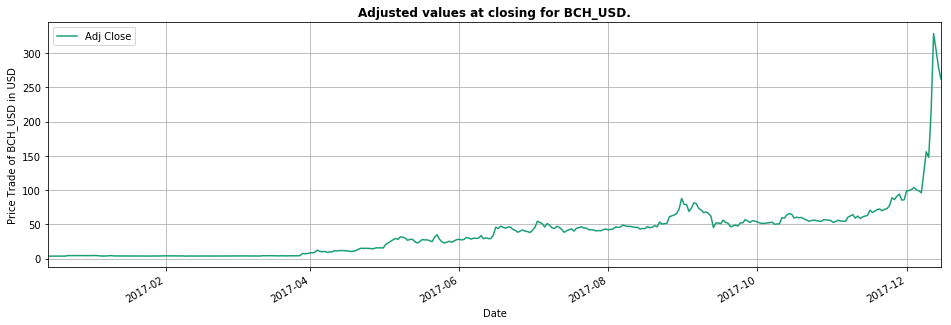

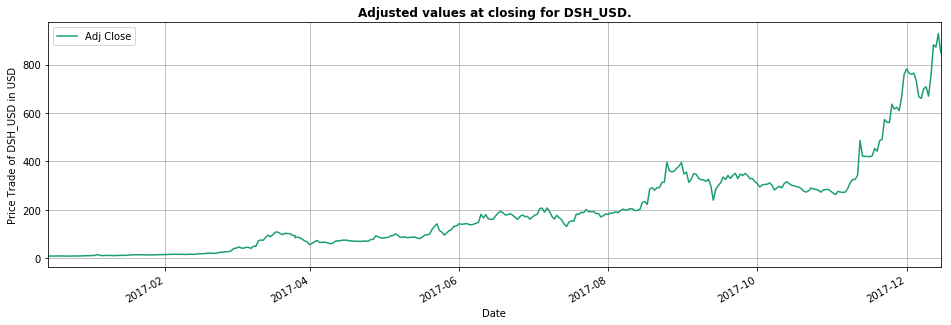

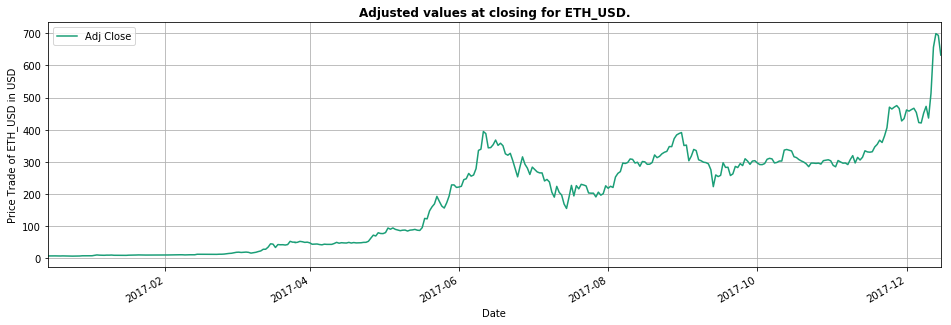

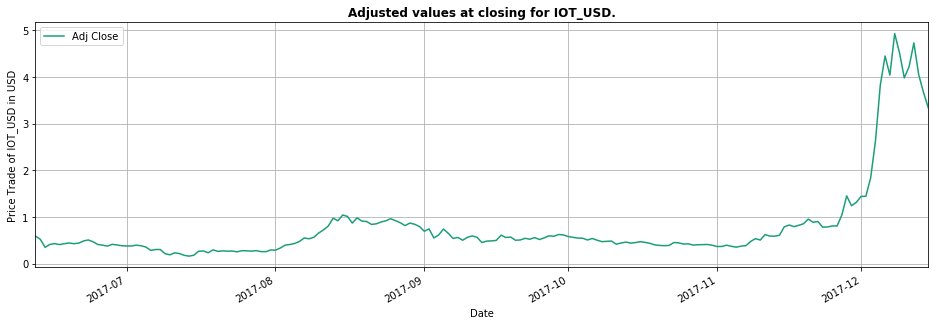

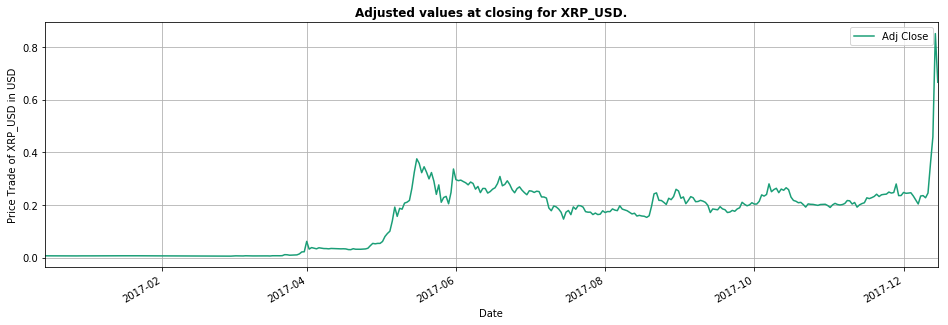

In [22]:
#Testing_Data_with _Ploting in loop for Adjusted close
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    i.plot(y="Adj Close",figsize=(16,5), grid=True, colormap='Dark2')
    plt.title("Adjusted values at closing for " + j + "." , weight='bold')
    plt.ylabel("Price Trade of " + j +" in USD")

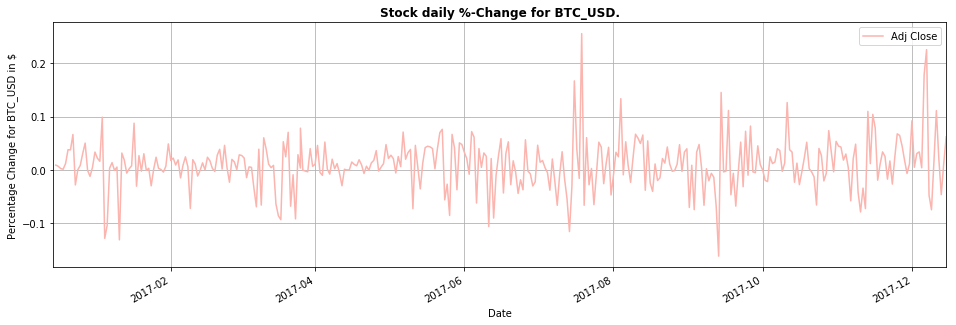

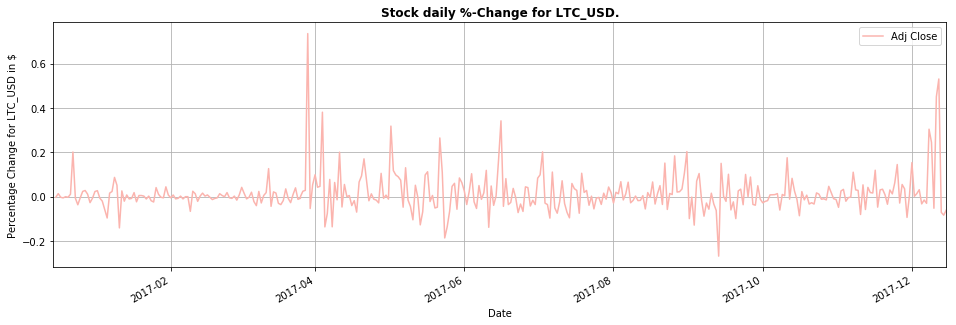

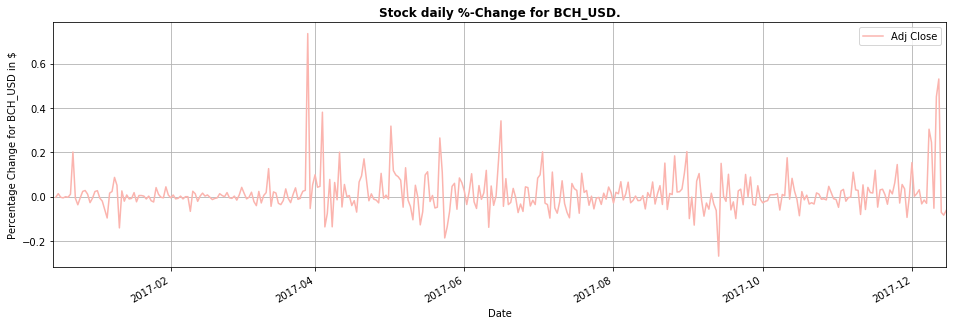

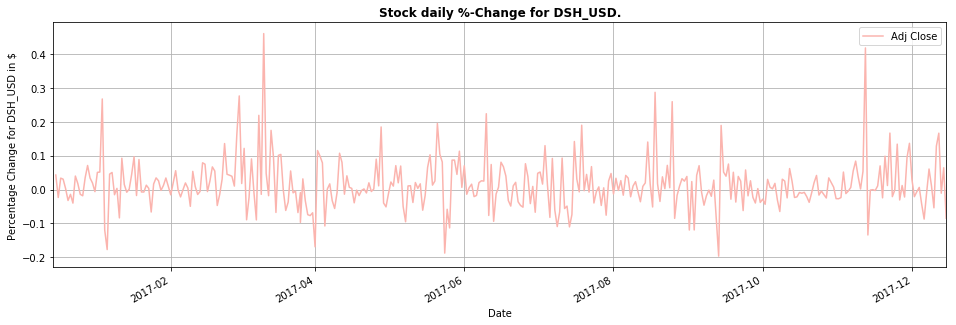

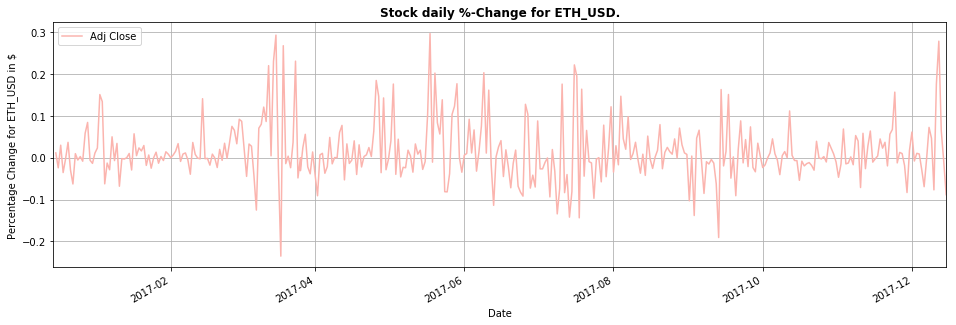

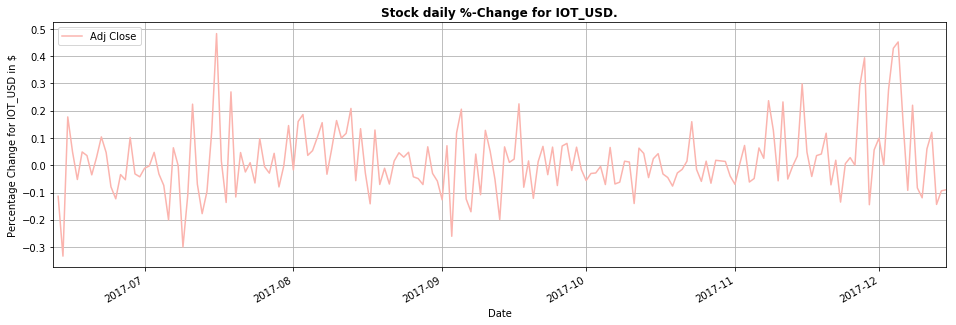

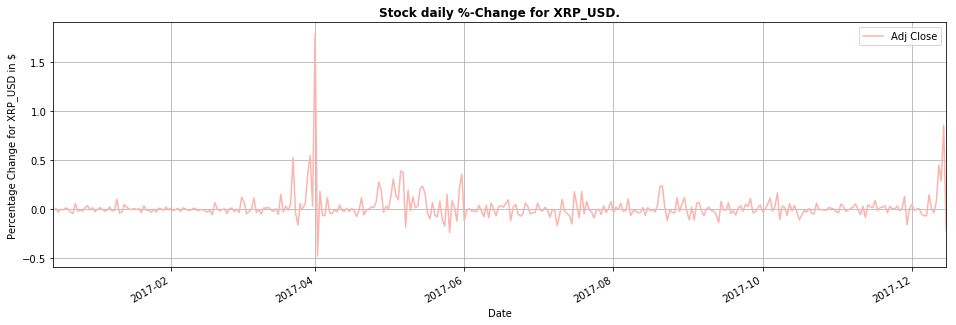

In [23]:
#Testing_Data_with _Ploting in loop
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    fig = plt.figure()
    i["Adj Close"].pct_change().plot(figsize=(16,5), grid=True, colormap='Pastel1')
    plt.title(u"Stock daily %-Change for "+ j + ".", weight='bold')
    plt.ylabel("Percentage Change for " + j +" in $")
    plt.legend()

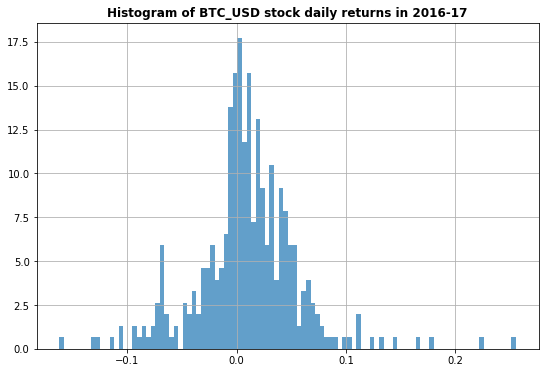

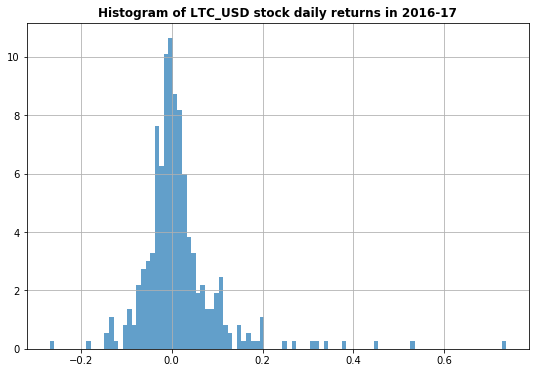

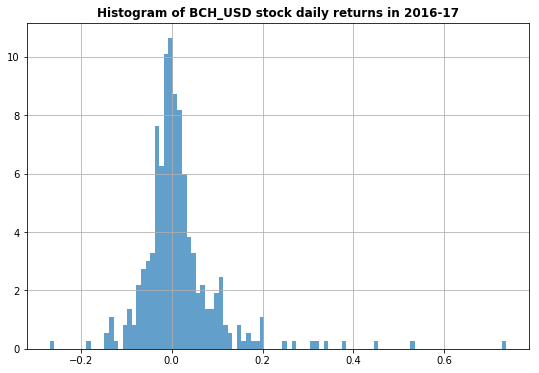

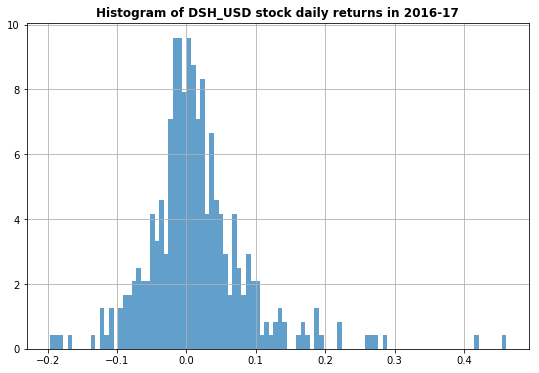

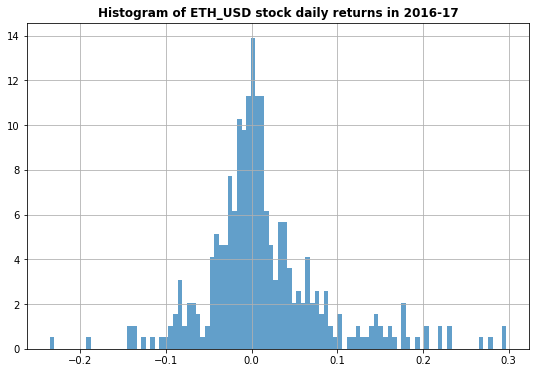

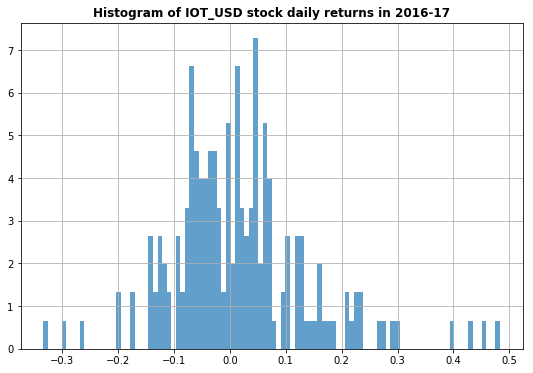

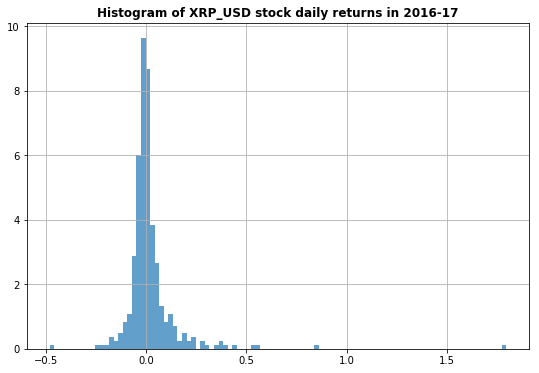

In [45]:
for i,j in itertools.zip_longest(Coin_list,Coin_list_str):
    fig = plt.figure()
    i["Adj Close"].pct_change().hist(bins=100, normed=True, histtype='stepfilled', alpha=0.7,figsize=(9,6))
    plt.title(u"Histogram of "+j+" stock daily returns in 2016-17", weight='bold')
    i["Adj Close"].pct_change().std()

In [25]:
#Correlation between the stocks with %change with trade next day
df = DataFrame({ 'BTC_USD': BTC_USD["Close"].pct_change(),
                 'IOT_USD': IOT_USD["Close"].pct_change(),
                 'LTC_USD': LTC_USD["Close"].pct_change(),
                 'BCH_USD': BCH_USD["Close"].pct_change(),
                 'XRP_USD': XRP_USD["Close"].pct_change(),
                 'ETH_USD': ETH_USD["Close"].pct_change(),
                 'DSH_USD': DSH_USD["Close"].pct_change()})
dfna = df.dropna()

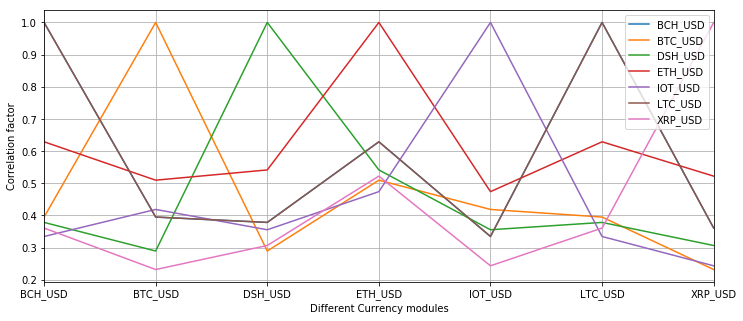

In [26]:
dfna.corr(method='pearson').plot(figsize=(12,5), grid=True)
plt.xlabel("Different Currency modules")
plt.ylabel("Correlation factor")

In [27]:
#Correlation between the stocks
df = DataFrame({ 'BTC_USD': BTC_USD["Close"],
                 'IOT_USD': IOT_USD["Close"],
                 'LTC_USD': LTC_USD["Close"],
                 'BCH_USD': BCH_USD["Close"],
                 'XRP_USD': XRP_USD["Close"],
                 'ETH_USD': ETH_USD["Close"],
                 'DSH_USD': DSH_USD["Close"]})
dfna = df.dropna()

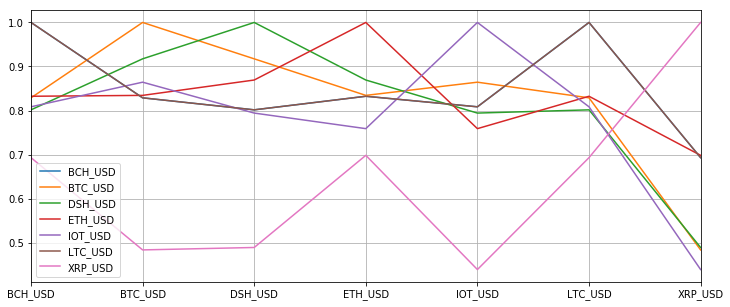

In [28]:
dfna.corr(method='pearson').plot(figsize=(12,5), grid=True)